REDDIT SENTIMENT ANALYSIS - DS I PROJECT

Research Question: How do men and women differ in their evaluations of workplace culture?
Hypothesis: Women prioritize culture; Men prioritize pay/promotion



In [17]:
!pip install pandas numpy matplotlib vaderSentiment


In [18]:
pip install gender-guesser

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
print("Setup complete! You can now run individual graphs below.")

Setup complete! You can now run individual graphs below.


In [11]:
import pandas as pd

df = pd.read_csv("reddit_data.csv")


In [12]:
df.head()

,comment_id,post_id,subreddit,author_username,comment_body,comment_score,comment_created_utc,parent_id,is_top_level,post_title,post_text,post_created_utc,post_url
0,e5rlkl4,9etcsl,AskWomen,Reese1993,Some of the worst places you don’t realize unt...,131,2018-09-11T08:52:27,t3_9etcsl,1,What are some subtle signs of a toxic workplace?,NaN,2018-09-11T07:04:12,https://www.reddit.com/r/AskWomen/comments/9et...
1,e5rn12k,9etcsl,AskWomen,Niasmomma99,When you feel perfectly well until you pull in...,123,2018-09-11T09:21:00,t3_9etcsl,1,What are some subtle signs of a toxic workplace?,NaN,2018-09-11T07:04:12,https://www.reddit.com/r/AskWomen/comments/9et...
2,e5rhrre,9etcsl,AskWomen,crazynekosama,High turnover rate. If people aren't staying l...,318,2018-09-11T07:48:11,t3_9etcsl,1,What are some subtle signs of a toxic workplace?,NaN,2018-09-11T07:04:12,https://www.reddit.com/r/AskWomen/comments/9et...
3,e5rf6iy,9etcsl,AskWomen,msstark,People talk about each other behind their backs.,167,2018-09-11T07:07:42,t3_9etcsl,1,What are some subtle signs of a toxic workplace?,NaN,2018-09-11T07:04:12,https://www.reddit.com/r/AskWomen/comments/9et...
4,e5rf7y0,9etcsl,AskWomen,a-little-sleepy,If you come to work in a good mood and someone...,168,2018-09-11T07:08:20,t3_9etcsl,1,What are some subtle signs of a toxic workplace?,NaN,2018-09-11T07:04:12,https://www.reddit.com/r/AskWomen/comments/9et...


In [13]:
df.columns

Index(['comment_id', 'post_id', 'subreddit', 'author_username', 'comment_body',
       'comment_score', 'comment_created_utc', 'parent_id', 'is_top_level',
       'post_title', 'post_text', 'post_created_utc', 'post_url'],
      dtype='object')

Create “gender” from subreddit (AskMen/AskWomen)

In [19]:
f = df[df["subreddit"].isin(["AskMen", "AskWomen"])].copy()

df["gender"] = df["subreddit"].map({
    "AskMen": "Men",
    "AskWomen": "Women"
})

df["gender"].value_counts()

gender
Men      16812
Women     8336
Name: count, dtype: int64

Generate sentiment labels

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["comment_body"].apply(get_sentiment)

df["sentiment_label"].value_counts()


sentiment_label
Positive    12310
Negative     7288
Neutral      5550
Name: count, dtype: int64

## Graph 1: Sentiment Distribution by Gender

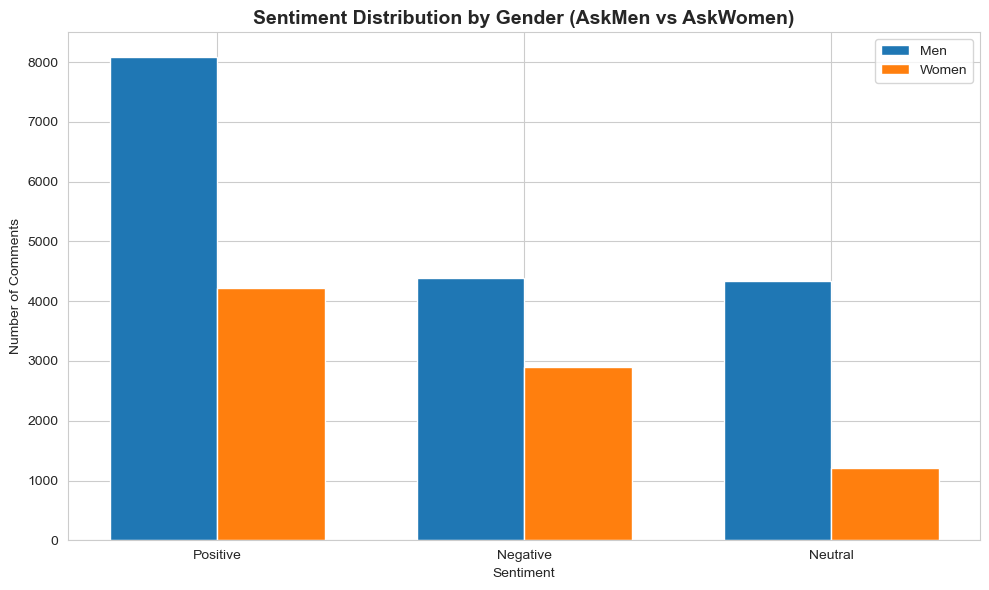

Saved: graph1_sentiment_by_gender.png


In [21]:
import numpy as np
import matplotlib.pyplot as plt

categories = ["Positive", "Negative", "Neutral"]

male_counts = df[df["gender"] == "Men"]["sentiment_label"].value_counts()
female_counts = df[df["gender"] == "Women"]["sentiment_label"].value_counts()

male_values = [male_counts.get(cat, 0) for cat in categories]
female_values = [female_counts.get(cat, 0) for cat in categories]

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, male_values, width, label="Men")
plt.bar(x + width/2, female_values, width, label="Women")

plt.title("Sentiment Distribution by Gender (AskMen vs AskWomen)", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()

plt.savefig("graph1_sentiment_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: graph1_sentiment_by_gender.png")


compute sentiment score

  gender  sentiment_score
0    Men         0.151124
1  Women         0.114523


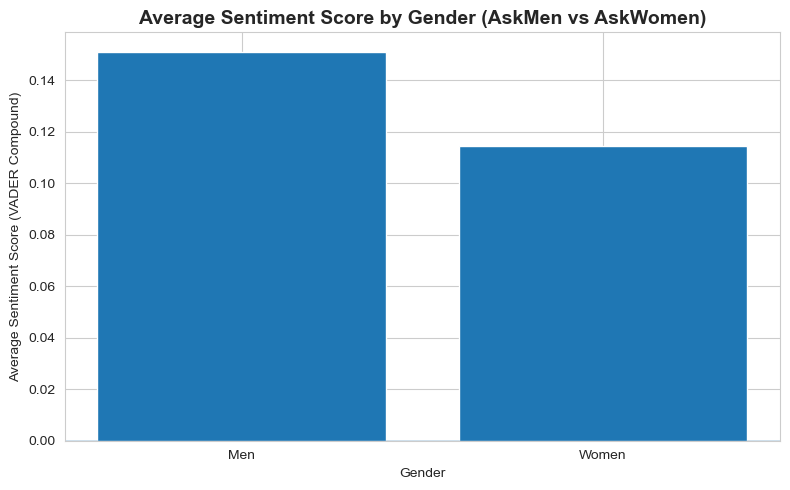

Saved: graph_avg_sentiment_by_gender.png


In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



# Create gender from subreddit

df = df[df["subreddit"].isin(["AskMen", "AskWomen"])].copy()

df["gender"] = df["subreddit"].map({
    "AskMen": "Men",
    "AskWomen": "Women"
})


# Compute sentiment score (VADER compound)

analyzer = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["comment_body"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)


# Average sentiment by gender

avg_sentiment = (
    df.groupby("gender")["sentiment_score"]
      .mean()
      .reset_index()
)

print(avg_sentiment)


#  Plot

plt.figure(figsize=(8, 5))
plt.bar(
    avg_sentiment["gender"],
    avg_sentiment["sentiment_score"]
)

plt.axhline(0, linewidth=1)

plt.title("Average Sentiment Score by Gender (AskMen vs AskWomen)",
          fontsize=14, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Average Sentiment Score (VADER Compound)")
plt.tight_layout()

plt.savefig("graph_avg_sentiment_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: graph_avg_sentiment_by_gender.png")


## Graph 3: Sentiment Percentage by Gender

  gender sentiment_label  percentage
0    Men        Positive   48.138235
1    Men        Negative   26.064716
2    Men         Neutral   25.797050
3  Women        Positive   50.587812
4  Women        Negative   34.860845


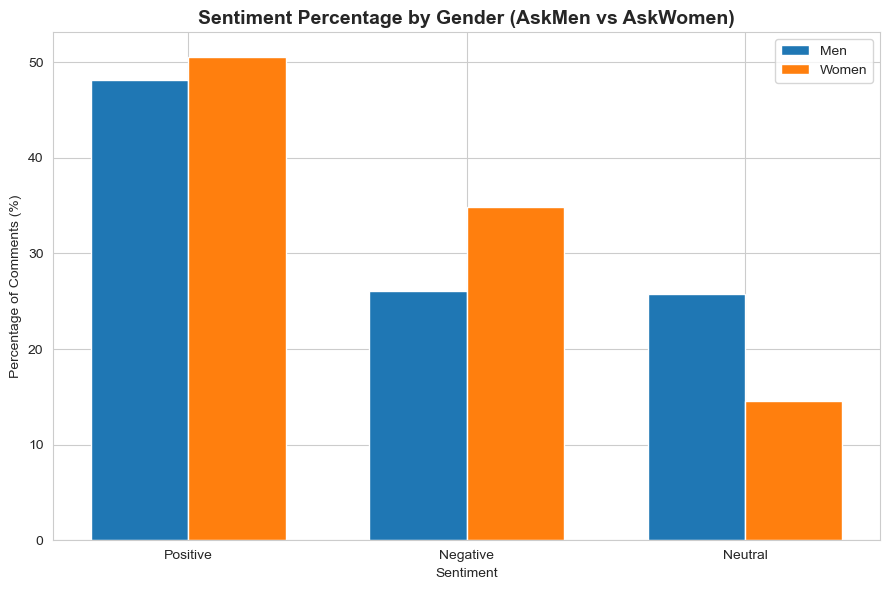

Saved: graph_sentiment_percentage_by_gender.png


In [35]:

# Sentiment labels
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["comment_body"].apply(get_sentiment)

# Percentages within gender (no reset_index conflict)
sentiment_pct = (
    df.groupby("gender")["sentiment_label"]
      .value_counts(normalize=True)
      .mul(100)
      .rename("percentage")
      .reset_index()
)

print(sentiment_pct.head())

# Pivot for plotting
categories = ["Positive", "Negative", "Neutral"]
pivot_df = (sentiment_pct
            .pivot(index="sentiment_label", columns="gender", values="percentage")
            .reindex(categories))

# If a category is missing for a group, fill with 0
pivot_df = pivot_df.fillna(0)

# Plot
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(9, 6))
plt.bar(x - width/2, pivot_df["Men"], width, label="Men")
plt.bar(x + width/2, pivot_df["Women"], width, label="Women")

plt.title("Sentiment Percentage by Gender (AskMen vs AskWomen)", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment")
plt.ylabel("Percentage of Comments (%)")
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()

plt.savefig("graph_sentiment_percentage_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: graph_sentiment_percentage_by_gender.png")


## Graph 4: Topic Focus - Culture vs Pay

gender         Men      Women
topic                        
Culture  62.015267  88.981198
Pay      37.984733  11.018802


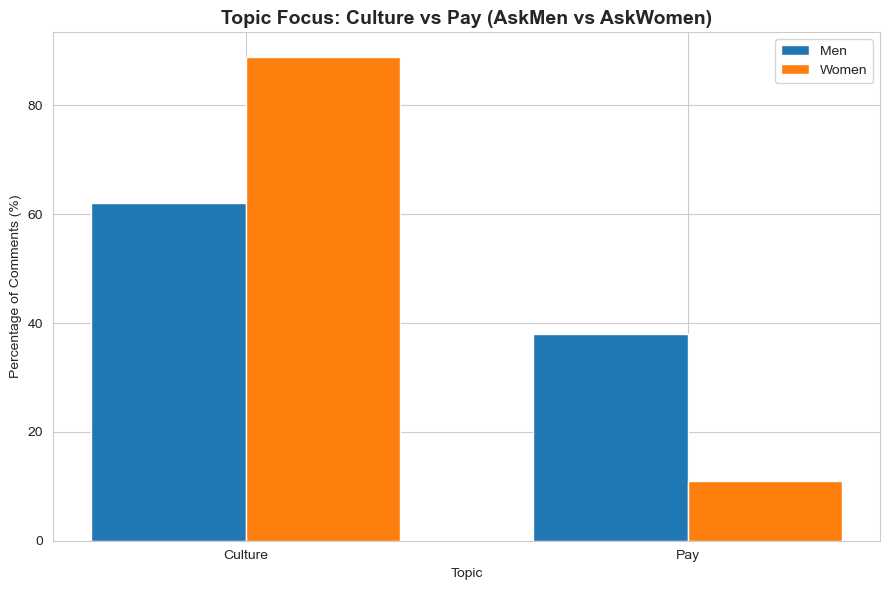

Saved: graph4_topic_focus_culture_vs_pay.png


In [34]:

# Define topic keywords

culture_keywords = [
    "culture", "toxic", "workplace", "manager", "boss", "team",
    "environment", "respect", "harassment", "discrimination",
    "diversity", "inclusion", "values", "flexibility", "burnout"
]

pay_keywords = [
    "pay", "salary", "wage", "income", "raise", "bonus",
    "compensation", "money", "benefits", "overtime", "hourly"
]

def classify_topic(text):
    t = str(text).lower()
    culture_hit = any(k in t for k in culture_keywords)
    pay_hit = any(k in t for k in pay_keywords)
    if culture_hit and not pay_hit:
        return "Culture"
    if pay_hit and not culture_hit:
        return "Pay"
    if culture_hit and pay_hit:
        return "Both"
    return "Other"

df["topic"] = df["comment_body"].apply(classify_topic)

# Keep only Culture vs Pay (drop Both/Other for a clean comparison)
df_topic = df[df["topic"].isin(["Culture", "Pay"])].copy()


# Percentages within gender

topic_pct = (
    df_topic.groupby("gender")["topic"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percentage")
    .reset_index()
)

# Pivot for plotting
pivot_df = (
    topic_pct.pivot(index="topic", columns="gender", values="percentage")
    .reindex(["Culture", "Pay"])
    .fillna(0)
)

print(pivot_df)


# Plot

x = np.arange(len(pivot_df.index))
width = 0.35

plt.figure(figsize=(9, 6))
plt.bar(x - width/2, pivot_df["Men"], width, label="Men")
plt.bar(x + width/2, pivot_df["Women"], width, label="Women")

plt.title("Topic Focus: Culture vs Pay (AskMen vs AskWomen)",
          fontsize=14, fontweight="bold")
plt.xlabel("Topic")
plt.ylabel("Percentage of Comments (%)")
plt.xticks(x, pivot_df.index)
plt.legend()
plt.tight_layout()

plt.savefig("graph4_topic_focus_culture_vs_pay.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: graph4_topic_focus_culture_vs_pay.png")

## Graph 5: Sentiment Score Distribution

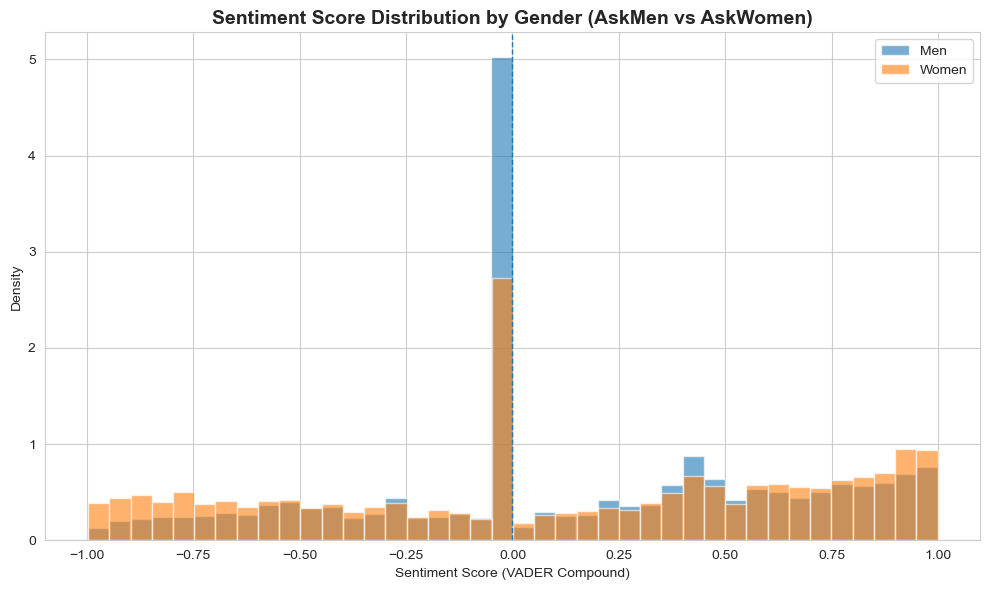

Saved: graph5_sentiment_score_distribution.png


In [33]:

# Sentiment scores

analyzer = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["comment_body"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)


#  Plot distributions (histograms)

plt.figure(figsize=(10, 6))

plt.hist(
    df[df["gender"] == "Men"]["sentiment_score"],
    bins=40,
    alpha=0.6,
    density=True,
    label="Men"
)

plt.hist(
    df[df["gender"] == "Women"]["sentiment_score"],
    bins=40,
    alpha=0.6,
    density=True,
    label="Women"
)

plt.axvline(0, linestyle="--", linewidth=1)  # neutral sentiment

plt.title("Sentiment Score Distribution by Gender (AskMen vs AskWomen)",
          fontsize=14, fontweight="bold")
plt.xlabel("Sentiment Score (VADER Compound)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

plt.savefig("graph5_sentiment_score_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: graph5_sentiment_score_distribution.png")

## Graph 6: Negative Sentiment Analysis

Negative comments by gender:
gender
Men      4381
Women    2906
Name: count, dtype: int64
  gender  sentiment_score
0    Men        -0.496962
1  Women        -0.564621


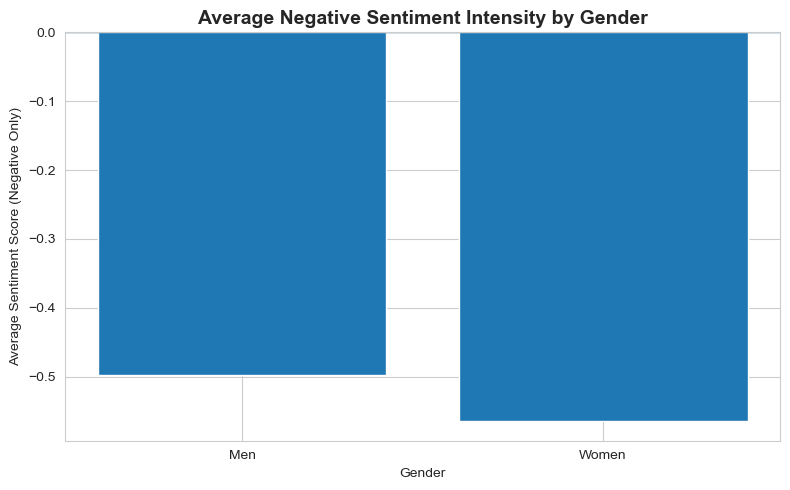

Saved: graph6_negative_sentiment_intensity.png


In [32]:

# Sentiment scores

analyzer = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["comment_body"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)


#Keep ONLY negative comments

neg_df = df[df["sentiment_score"] < -0.05].copy()

# Sanity check
print("Negative comments by gender:")
print(neg_df["gender"].value_counts())


# Average negative sentiment by gender

avg_negative = (
    neg_df.groupby("gender")["sentiment_score"]
    .mean()
    .reset_index()
)

print(avg_negative)


# Plot

plt.figure(figsize=(8, 5))
plt.bar(
    avg_negative["gender"],
    avg_negative["sentiment_score"]
)

plt.axhline(0, linewidth=1)

plt.title("Average Negative Sentiment Intensity by Gender",
          fontsize=14, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Average Sentiment Score (Negative Only)")
plt.tight_layout()

plt.savefig("graph6_negative_sentiment_intensity.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: graph6_negative_sentiment_intensity.png")

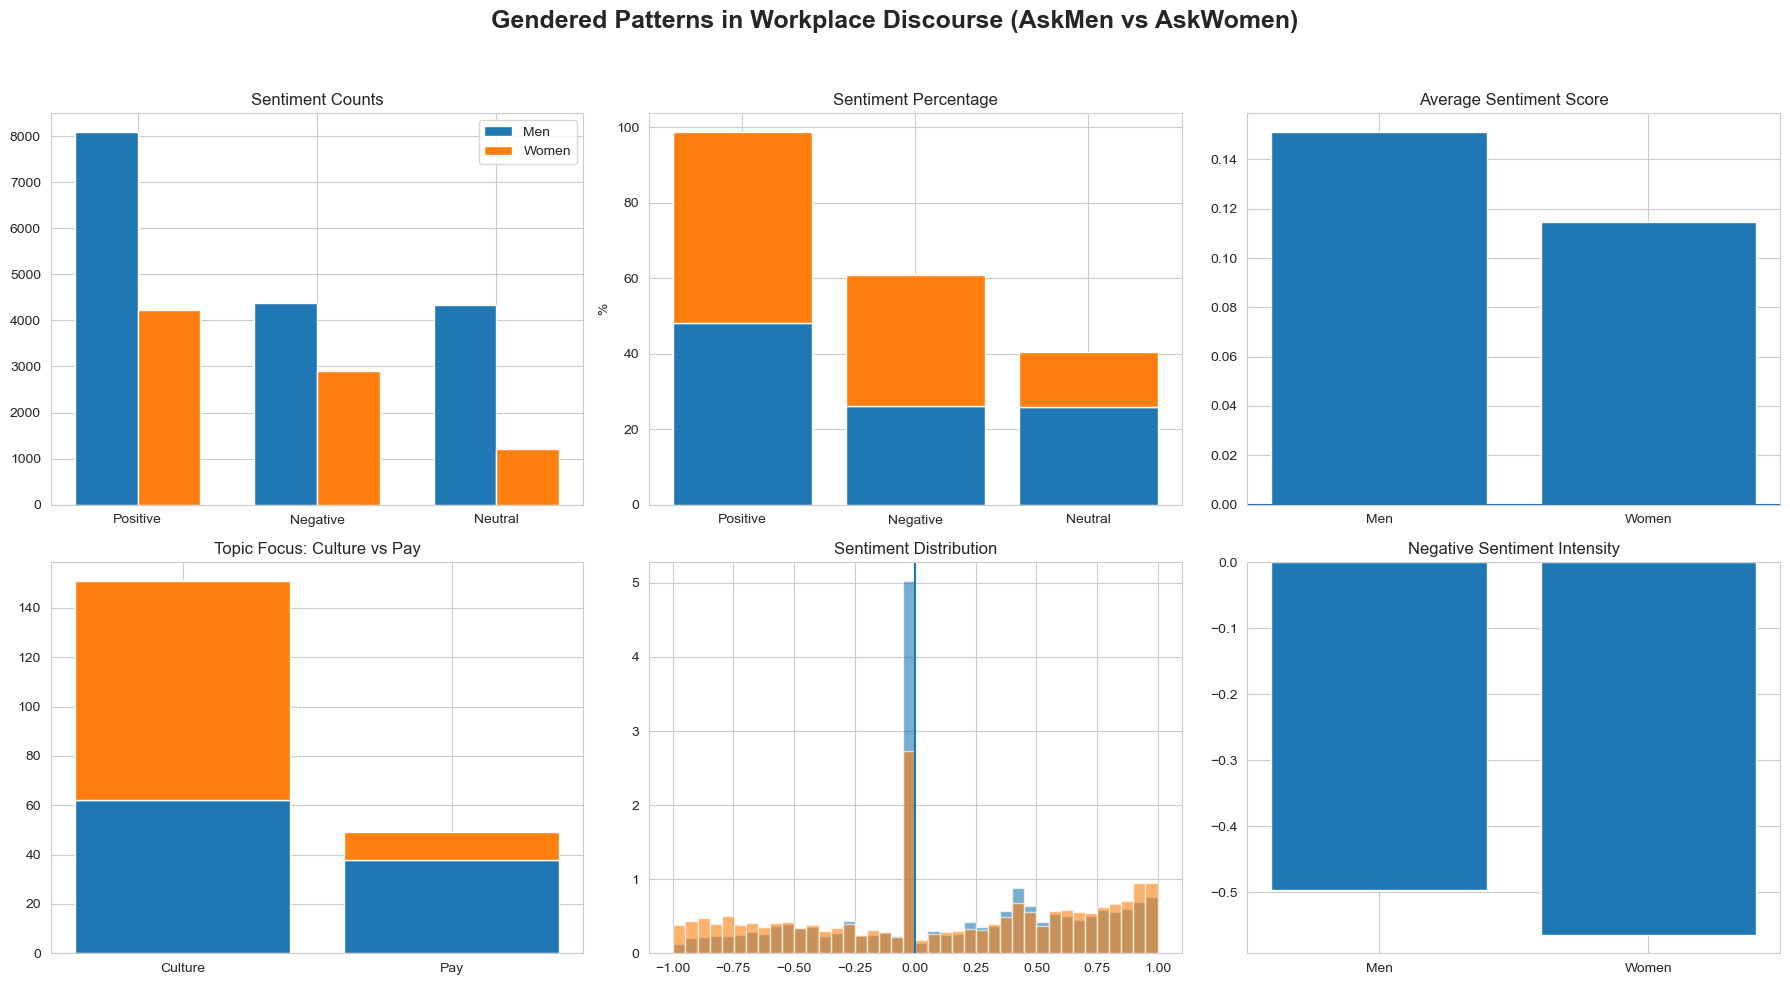

Saved: six_panel_sentiment_analysis.png


In [37]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # makes indexing easier

# -------------------------
# Graph 1: Sentiment counts
# -------------------------
categories = ["Positive", "Negative", "Neutral"]

male_counts = df[df["gender"] == "Men"]["sentiment_label"].value_counts()
female_counts = df[df["gender"] == "Women"]["sentiment_label"].value_counts()

male_vals = [male_counts.get(c, 0) for c in categories]
female_vals = [female_counts.get(c, 0) for c in categories]

x = np.arange(len(categories))
w = 0.35

axes[0].bar(x - w/2, male_vals, w, label="Men")
axes[0].bar(x + w/2, female_vals, w, label="Women")
axes[0].set_title("Sentiment Counts")
axes[0].set_xticks(x)
axes[0].set_xticklabels(categories)
axes[0].legend()

# -------------------------
# Graph 2: Sentiment %
# -------------------------
sent_pct = (
    df.groupby("gender")["sentiment_label"]
      .value_counts(normalize=True)
      .mul(100)
      .unstack()
      .reindex(categories, axis=1)
)

axes[1].bar(categories, sent_pct.loc["Men"], label="Men")
axes[1].bar(categories, sent_pct.loc["Women"], bottom=sent_pct.loc["Men"], label="Women")
axes[1].set_title("Sentiment Percentage")
axes[1].set_ylabel("%")

# -------------------------
# Graph 3: Avg sentiment
# -------------------------
avg_sent = df.groupby("gender")["sentiment_score"].mean()

axes[2].bar(avg_sent.index, avg_sent.values)
axes[2].axhline(0)
axes[2].set_title("Average Sentiment Score")

# -------------------------
# Graph 4: Topic focus
# -------------------------
topic_pct = (
    df[df["topic"].isin(["Culture", "Pay"])]
    .groupby("gender")["topic"]
    .value_counts(normalize=True)
    .mul(100)
    .unstack()
)

axes[3].bar(topic_pct.columns, topic_pct.loc["Men"], label="Men")
axes[3].bar(topic_pct.columns, topic_pct.loc["Women"], bottom=topic_pct.loc["Men"], label="Women")
axes[3].set_title("Topic Focus: Culture vs Pay")

# -------------------------
# Graph 5: Distribution
# -------------------------
axes[4].hist(df[df["gender"] == "Men"]["sentiment_score"], bins=40, alpha=0.6, density=True)
axes[4].hist(df[df["gender"] == "Women"]["sentiment_score"], bins=40, alpha=0.6, density=True)
axes[4].axvline(0)
axes[4].set_title("Sentiment Distribution")

# -------------------------
# Graph 6: Negative intensity
# -------------------------
neg_avg = df[df["sentiment_score"] < -0.05].groupby("gender")["sentiment_score"].mean()

axes[5].bar(neg_avg.index, neg_avg.values)
axes[5].set_title("Negative Sentiment Intensity")

# -------------------------
# Final formatting
# -------------------------
fig.suptitle("Gendered Patterns in Workplace Discourse (AskMen vs AskWomen)",
             fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("six_panel_sentiment_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: six_panel_sentiment_analysis.png")
